In [1]:
#from keras.layers import Bidirectional
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Loading Dataset from memory

In [2]:
csv_file_list = ["NewCase1.csv", "NewCase2.csv","NewCase3.csv" ]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename, usecols=[1], engine='python'))

df = pd.concat(list_of_dataframes)
#df['RelativeTimeMilliseconds'] = df['RelativeTimeMilliseconds'].astype(np.float32)
df['HR'] = df['HR'].astype(np.float32)
df=df.fillna(df.mean())
print(df)
df.head()

# load the dataset
#dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = df.values
dataset = dataset.astype('float32')
df.info()
print(dataset.shape)

         HR
0      55.0
1      55.0
2      55.0
3      55.0
4      55.0
...     ...
11921  66.0
11922  66.0
11923  66.0
11924  66.0
11925  66.0

[34208 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34208 entries, 0 to 11925
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR      34208 non-null  float32
dtypes: float32(1)
memory usage: 400.9 KB
(34208, 1)


In [3]:
 #df['RelativeTimeMilliseconds'] = pd.to_timedelta(df['RelativeTimeMilliseconds'], unit='ms')
 #df['RelativeTimeMilliseconds']

# Normalizing the dataset

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset.shape)

(34208, 1)


# Spliting the Dataset into Train/Test

In [5]:

# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
print(train.shape)
print(test.shape)

27366 6842
(27366, 1)
(6842, 1)


In [6]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
 

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
trainX= numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#trainX = trainX.reshape(-1, 1, 1)
testX  = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#trainY = trainY.reshape(-1, 1, 1)
#testY = testY.reshape(-1, 1, 1)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(27364, 1, 1)
(27364,)
(6840, 1, 1)
(6840,)


# Training

In [10]:
nsamples, nx, ny = trainX.shape
d2_train_dataset = trainX.reshape((nsamples,nx*ny))

reg = LinearRegression().fit(d2_train_dataset, trainY)

In [11]:

# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_absolute_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=10, batch_size=128, verbose=2)

# Prediction

In [12]:
# Reshape 3d to 2d trainx
nsamples, nx, ny = trainX.shape
d2_train_dataset = trainX.reshape((nsamples,nx*ny))
# Reshape 3d to 2d testx
nsamples, nx, ny = testX.shape
d2_test_dataset = testX.reshape((nsamples,nx*ny))

# make predictions
trainPredict = reg.predict(d2_train_dataset)
testPredict = reg.predict(d2_test_dataset)

# invert predictions
trainPredict= trainPredict.reshape(-1, 1)
testPredict= testPredict.reshape(-1, 1)
trainPredict = scaler.inverse_transform(trainPredict)


# print(trainY.shape)
# trainY= trainY.reshape(-1, 1)
# #d2_trainy_dataset = trainY.reshape((nx,ny))
# trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

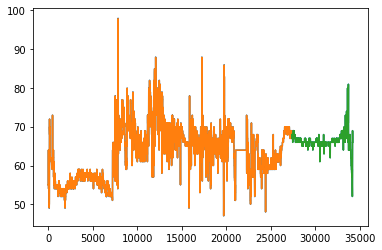

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
predit = reg.predict([[67]])
#testPredict = scaler.inverse_transform([[67]])
#print (testPredict)

In [15]:
import socket
from _thread import *
import threading 
import json
from io import StringIO

In [ ]:
import socket
from _thread import *
import threading 
import json
from io import StringIO
def threaded(c):
    data = c.recv(1024)
    print (data)
    data = json.loads( data.decode("utf-8")  )
    label = reg.predict([[float(data)]])
    print( label )
    print( "Data" , json.dumps({"label": int(label[0]) })  )
    c.send(  json.dumps({"label": int(label[0]) }).encode('utf-8')   )
    c.close()
port = 5000
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
s.bind((  "0.0.0.0" , port  )) 
print("socket binded to port", port )
s.listen(500) 
print("socket is listening")
all_conn = []
while True:
    conn, addr = s.accept()
    print('Connected to :', addr[0], ':', addr[1])
    all_conn.append( conn )
    start_new_thread(threaded, (conn,))
s.close()

socket binded to port 5000
socket is listening
Connected to : 192.168.10.10 : 57964
Connected to : 192.168.10.10 : 57965
Connected to : 192.168.10.10 :b'76.0\n'
[75.69981974]
Data {"label": 75}
 57966
Connected to : 192.168.10.10 : 57980
Connected to : 192.168.10.10 : 57981
Connected to : 192.168.10.10 : 57983
Connected to : 192.168.10.10 : 57984
b'76.0\n'
[75.69981974]
Data {"label": 75}Connected to : 192.168.10.10 : 57985

b'75.0\n'
[74.70378637]
Data {"label": 74}
b'89.0\n'
[88.64825356]
Data {"label": 88}
b'80.0\n'
[79.68395323]
Data {"label": 79}
b'93.0\n'
[92.63238704]
Data {"label": 92}
b'90.0\n'Connected to : 192.168.10.10 : 57986
b'78.0\n'
[77.69188648]
Data {"label": 77}

Connected to : [89.64428693]
Data {"label": 89}
b'79.0\n'
[78.68791986]
Data {"label": 78}
192.168.10.10 : 57987
Connected to : 192.168.10.10 : 57988
Connected to : 192.168.10.10 :b'92.0\n'
[91.63635367]
Data {"label": 91}
 b'88.0\n'
[87.65222019]
Data {"label": 87}
57989
Connected to : 192.168.10.10 :b'93.0

Connected to : 192.168.10.10 : 58120
Connected to : 192.168.10.10 : 58121
b'77.0\n'
[76.69585311]
Data {"label": 76}
b'80.0\n'Connected to : 192.168.10.10
[79.68395323]
 Data {"label": 79}
: 58122
Connected to : 192.168.10.10 : 58123
Connected to : 192.168.10.10b'89.0\n' 
[88.64825356]
Data {"label": 88}
: 58131
Connected to : 192.168.10.10 : 58132
Connected to : 192.168.10.10 : 58133
Connected to : 192.168.10.10 : 58134
Connected to : 192.168.10.10 : 58135
Connected to : 192.168.10.10 : 58136
b'73.0\n'
b'77.0\n'
b'77.0\n'
[76.69585311]
Data {"label": 76}
[76.69585311]
Data {"label": 76}
b'83.0\n'
[82.67205334]
Data [72.71171963]b'79.0\n'
[78.68791986]
Data {"label": 78}
b'74.0\n'
[73.707753]
Data {"label": 73}

Connected to : 192.168.10.10 : 58137
{"label": 82}Connected to : 192.168.10.10 : 58138
b'97.0\n'
[96.61652052]
Data {"label": 96}
Data {"label": 72}
Connected to : 192.168.10.10 :
 58139
Connected to : 192.168.10.10 : 58140
b'84.0\n'
[83.66808671]
Data {"label": 83}b'78.0\n'
[7